# Reference RL algorithm for cartpole environment

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
%matplotlib inline

## Cartpole environment

In [2]:
env = gym.make('CartPole-v0')

In [3]:
env.observation_space, env.action_space

(Box(4,), Discrete(2))

In [4]:
obs = env.reset()

In [87]:
# Test out the environment with a random policy
done = False
while not done:
    action = np.random.choice([0, 1])
    obs, reward, done, _ = env.step(action)
    env.render()
    time.sleep(0.02)
env.close(); env.reset();

## Train a reference RL algorithm: DQN

Let's use stable-baselines for this.

In [14]:
from stable_baselines import DQN, ACKTR, ACER
from stable_baselines.bench import Monitor
from stable_baselines.common.vec_env import DummyVecEnv, SubprocVecEnv

In [31]:
n_cpu = 2
env = SubprocVecEnv([
    lambda: Monitor(gym.make('CartPole-v1'), 'acer', allow_early_resets=True)
    for i in range(n_cpu)])

In [32]:
model = ACKTR('MlpPolicy', env, verbose=1)

In [33]:
model.learn(total_timesteps=25000)

---------------------------------
| ep_len_mean        | 15       |
| ep_reward_mean     | 15       |
| explained_variance | 0.00182  |
| fps                | 14       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| policy_loss        | 5.67     |
| total_timesteps    | 0        |
| value_loss         | 91.7     |
---------------------------------
---------------------------------
| ep_len_mean        | 69.8     |
| ep_reward_mean     | 69.8     |
| explained_variance | 0.0218   |
| fps                | 505      |
| nupdates           | 100      |
| policy_entropy     | 0.591    |
| policy_loss        | 4.41     |
| total_timesteps    | 4059     |
| value_loss         | 65.9     |
---------------------------------
---------------------------------
| ep_len_mean        | 119      |
| ep_reward_mean     | 119      |
| explained_variance | 0.00171  |
| fps                | 586      |
| nupdates           | 200      |
| policy_entropy     | 0.484    |
| policy_loss 

In [34]:
log = pd.read_csv('acer.monitor.csv', index_col=False,
                  skiprows=1)

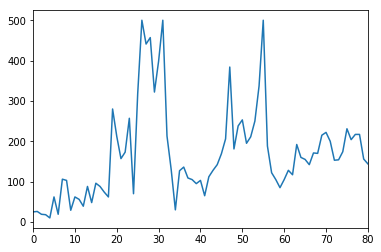

In [35]:
# Plot learning
log.l.plot()

In [36]:
# Test how well the model does
obs = env.reset()
done = False
while not done:
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    env.render()
    time.sleep(0.02)
env.close(); env.reset(); 


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [103]:
env.close()